In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import minimize
import pandas as pd

laserDoble = "data_doble_laser.xlsx"
laser2df = pd.read_excel(laserDoble)
print(laser2df)
laser2X = laser2df["x_desf (m)"]
laser2V = laser2df["V (V)"]

     x_desf (um)  V(mV)  x_error (um)  V_error (mV)  x_desf (m)   V (V)  \
0          -5860   19.3             5           0.1    -0.00586  0.0193   
1          -5840   19.6             5           0.1    -0.00584  0.0196   
2          -5820   19.9             5           0.1    -0.00582  0.0199   
3          -5800   20.4             5           0.1    -0.00580  0.0204   
4          -5780   21.3             5           0.1    -0.00578  0.0213   
..           ...    ...           ...           ...         ...     ...   
260         -660  719.5             5           0.1    -0.00066  0.7195   
261         -640  699.5             5           0.1    -0.00064  0.6995   
262         -620  683.5             5           0.1    -0.00062  0.6835   
263         -600  664.5             5           0.1    -0.00060  0.6645   
264         -580  655.5             5           0.1    -0.00058  0.6555   

     x_error (m)  V_error (V)  
0       0.000005       0.0001  
1       0.000005       0.0001  
2  

Best Parameters: [1.22912350e+00 6.74576940e+02 3.16501825e+03]


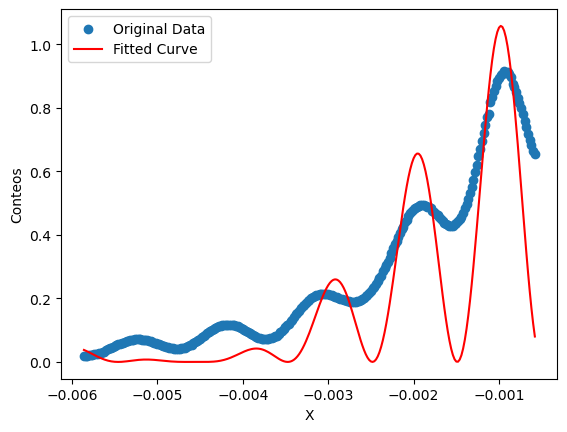

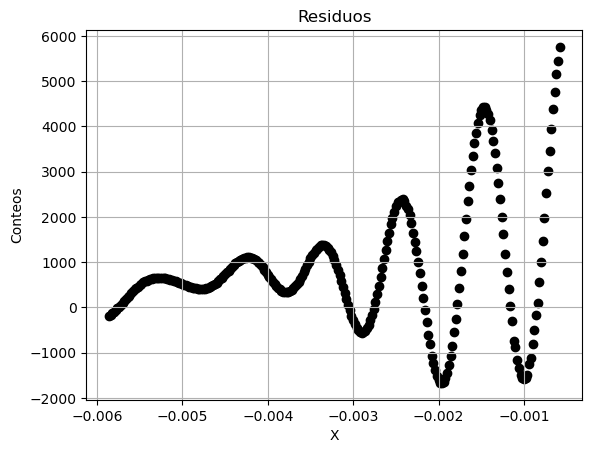

In [2]:
# modelo
def intensity(params, x):
    A, C, D = params
    return A * np.cos(D*(x))**2 * (np.sin(C*(x)+1e-12)/(C*(x)+1e-12))**2

# funcion de perdida
def loss(params, x, observed):
    predicted = intensity(params, x)
    return np.mean((predicted - observed) ** 2)

# Parametros estimados
initial_guess = [1.2415, 468.89, 1669.26]

# Minimizacion de la funcion de perdida por el metodo Nelder-Mead (hyperparameters)
result = minimize(loss, initial_guess, args=(laser2X, laser2V),method='Nelder-Mead')

# Sacamos los mejores parametros
best_params = result.x
print("Best Parameters:", best_params)

#valores en Y para el modelo para graficar
Y = intensity(best_params, laser2X)

plt.scatter(laser2X, laser2V, label='Original Data')
plt.plot(laser2X, Y, color='red', label='Fitted Curve')
plt.xlabel('X')
plt.ylabel('Conteos')
plt.legend()
plt.show()

plt.scatter(laser2X, (laser2V-Y)/laser2df["V_error (V)"], label='Residuos', color='black')
plt.grid()
plt.xlabel('X')
plt.ylabel('Conteos')
plt.title('Residuos')
plt.show()